In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

print(tf.__version__)

2.2.0


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [55]:
10.**1.5

31.622776601683793

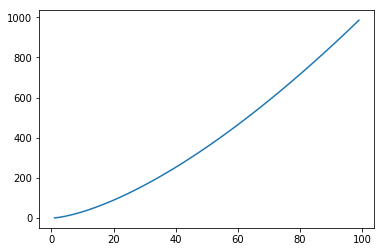

In [95]:
n=1.5
X=np.arange(1.,100.)
const=np.ones(len(X))
y=X**n
plt.plot(X,y)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(1,-1))

In [152]:
inputs1 = keras.Input(shape=(1,))
inputs2 = keras.Input(shape=(1,))
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
power = layers.Dense(16)(inputs2) #kernel_initializer=initializer
initializer = tf.keras.initializers.RandomNormal(mean=n, stddev=n/2)
power = layers.Dense(1, kernel_initializer=initializer, use_bias=False)(power)
outputs = tf.pow(inputs1, power)

In [153]:
model = keras.Model(inputs=[inputs1, inputs2], outputs=outputs)

In [154]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 16)           32          input_22[0][0]                   
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 1)            16          dense_20[0][0]                   
___________________________________________________________________________________________

In [155]:
model.compile(
    loss="mse",
    optimizer=keras.optimizers.SGD(1e-5)
)

In [156]:
model.fit([X_scaled[0],const], y, batch_size=100, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 4/100
1/1 [==============================] - 0s 990us/step - loss: 247500.0000
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 247500.0000
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0156

1/1 [==============================] - 0s 2ms/step - loss: 247500.0000
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000
Epoch 99/100
1/1 [==============================] - 0s 966us/step - loss: 247500.0000
Epoch 100/100
1/1 [==============================] - 0s 1ms/step - loss: 247500.0000


In [157]:
out = model.predict([X,const])

In [158]:
out[:,0]

array([1.00000000e+00, 6.40518904e+00, 1.89811668e+01, 4.10264473e+01,
       7.45949173e+01, 1.21577965e+02, 1.83747513e+02, 2.62782166e+02,
       3.60284698e+02, 4.77794525e+02, 6.16796875e+02, 7.78729858e+02,
       9.64990173e+02, 1.17693762e+03, 1.41589856e+03, 1.68316943e+03,
       1.98001929e+03, 2.30769165e+03, 2.66740723e+03, 3.06036450e+03,
       3.48774219e+03, 3.95070068e+03, 4.45038184e+03, 4.98791211e+03,
       5.56440137e+03, 6.18094482e+03, 6.83862402e+03, 7.53850781e+03,
       8.28165137e+03, 9.06909766e+03, 9.90187988e+03, 1.07810186e+04,
       1.17075244e+04, 1.26823984e+04, 1.37066299e+04, 1.47812021e+04,
       1.59070859e+04, 1.70852480e+04, 1.83166406e+04, 1.96022129e+04,
       2.09429043e+04, 2.23396484e+04, 2.37933691e+04, 2.53049844e+04,
       2.68754062e+04, 2.85055391e+04, 3.01962793e+04, 3.19485215e+04,
       3.37631484e+04, 3.56410430e+04, 3.75830781e+04, 3.95901211e+04,
       4.16630352e+04, 4.38026836e+04, 4.60099102e+04, 4.82855703e+04,
      

In [159]:
out[:,0] - y

array([0.00000000e+00, 3.57676191e+00, 1.37850144e+01, 3.30264473e+01,
       6.34145774e+01, 1.06881026e+02, 1.65227254e+02, 2.40154749e+02,
       3.33284698e+02, 4.46171749e+02, 5.80314002e+02, 7.37160639e+02,
       9.18118007e+02, 1.12455442e+03, 1.35780381e+03, 1.61916943e+03,
       1.90992649e+03, 2.23132412e+03, 2.58458815e+03, 2.97092178e+03,
       3.39150810e+03, 3.84751154e+03, 4.34007771e+03, 4.87033660e+03,
       5.43940137e+03, 6.04837032e+03, 6.69832791e+03, 7.39034574e+03,
       8.12548159e+03, 8.90478089e+03, 9.72927919e+03, 1.05999992e+04,
       1.15179538e+04, 1.24841461e+04, 1.34995671e+04, 1.45652021e+04,
       1.56820237e+04, 1.68510003e+04, 1.80730857e+04, 1.93492307e+04,
       2.06803762e+04, 2.20674573e+04, 2.35113993e+04, 2.50131214e+04,
       2.65735371e+04, 2.81935519e+04, 2.98740635e+04, 3.16159677e+04,
       3.34201484e+04, 3.52874896e+04, 3.72188653e+04, 3.92151438e+04,
       4.12771893e+04, 4.34058663e+04, 4.56020192e+04, 4.78665047e+04,
      

In [160]:
y

array([  1.        ,   2.82842712,   5.19615242,   8.        ,
        11.18033989,  14.69693846,  18.52025918,  22.627417  ,
        27.        ,  31.6227766 ,  36.48287269,  41.56921938,
        46.87216658,  52.38320341,  58.09475019,  64.        ,
        70.09279564,  76.36753237,  82.81907993,  89.4427191 ,
        96.23408959, 103.18914672, 110.30412504, 117.57550765,
       125.        , 132.57450735, 140.29611541, 148.16207342,
       156.16977941, 164.31676725, 172.60069525, 181.01933598,
       189.57056734, 198.25236442, 207.06279241, 216.        ,
       225.06221362, 234.24773211, 243.55492194, 252.98221281,
       262.52809373, 272.19110933, 281.96985654, 291.86298155,
       301.86917696, 311.98717922, 322.21576622, 332.55375505,
       343.        , 353.55339059, 364.21284986, 374.97733265,
       385.84582413, 396.81733833, 407.89091679, 419.06562732,
       430.34056281, 441.71484014, 453.18759912, 464.75800154,
       476.42523023, 488.18848819, 500.04699779, 512.  